In [60]:

#First thing we need to do is import the respected library


import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *



In [61]:
#Connecting the SQL data and converting it into a DataFrame

In [62]:
cnx = sqlite3.connect('database 2.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [63]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [65]:
#Now we are going to clean the data and first dropping the Null values.

In [66]:
df.isnull().any().any(), df.shape


(True, (183978, 42))

In [67]:
df.isnull().sum(axis =0 )

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [68]:
#Now the way to clean the data is by deleting the rows that contain null values, this might not be the most useful case as we might miss a lot of missing data 
#however for the simple nature of this project we should do that.... 

In [69]:
df.shape[0]

183978

In [70]:
#here we are dropping the null values
df = df.dropna()

In [71]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [72]:
#Now if we check to make sure that we dropped all the Null values
df.isnull().sum(axis =0 )

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [73]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

In [74]:
print(df)

            id  player_fifa_api_id  player_api_id                 date  \
109890  109891              164495          27364  2011-08-30 00:00:00   
151061  151062              193061         210278  2014-10-17 00:00:00   
165325  165326              198146         183548  2013-09-20 00:00:00   
26662    26663              198951         201939  2016-01-07 00:00:00   
55823    55824              210982         477475  2013-11-15 00:00:00   
68954    68955              189498         213627  2009-02-22 00:00:00   
167040  167041              190061         128239  2014-10-02 00:00:00   
73906    73907              112552          75395  2013-11-29 00:00:00   
72913    72914              171017         213812  2015-04-10 00:00:00   
165176  165177              144075           8784  2012-08-31 00:00:00   
144526  144527              183453          94321  2015-01-09 00:00:00   
162848  162849              163774          24693  2014-01-31 00:00:00   
56724    56725              215755    

In [75]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
109890,109891,164495,27364,2011-08-30 00:00:00,71.0,76.0,right,medium,high,65.0,...,74.0,75.0,71.0,65.0,68.0,13.0,13.0,9.0,8.0,7.0
151061,151062,193061,210278,2014-10-17 00:00:00,77.0,84.0,right,high,high,77.0,...,81.0,59.0,59.0,69.0,72.0,11.0,10.0,8.0,8.0,7.0
165325,165326,198146,183548,2013-09-20 00:00:00,64.0,68.0,right,high,medium,40.0,...,69.0,54.0,23.0,23.0,27.0,7.0,14.0,14.0,7.0,12.0
26662,26663,198951,201939,2016-01-07 00:00:00,78.0,84.0,right,medium,medium,69.0,...,72.0,71.0,30.0,29.0,21.0,6.0,13.0,6.0,14.0,6.0
55823,55824,210982,477475,2013-11-15 00:00:00,59.0,75.0,left,medium,medium,60.0,...,55.0,45.0,60.0,59.0,63.0,7.0,8.0,7.0,7.0,11.0


In [76]:
df[:20][['penalties', 'overall_rating']]


,penalties,overall_rating
109890,75.0,71.0
151061,59.0,77.0
165325,54.0,64.0
26662,71.0,78.0
55823,45.0,59.0
68954,44.0,60.0
167040,25.0,58.0
73906,56.0,67.0
72913,38.0,72.0
165176,56.0,57.0


In [77]:
#Now We begin the correlation analysis of the data by checking if all the features(columns) are correlated 


In [78]:
#by using the using Pearson's correlation coefficient
df['overall_rating'].corr(df['penalties'])

0.3927151079111883

In [79]:
#by finding the pearsons correlations coefficient (runs from  -1 to +1) if the number is 0 then their isnt any relationship


In [80]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy',
                     'ball_control', 'shot_power', 'stamina']

In [81]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [82]:
#based on the test we made above, we know that there are two variable that seem to have a much stronger relationship with the overall rating, and that is ball_control and shot_power


In [83]:
#DATA VISUALIZATION
#since we are doing data visualization, we will test the correlations between all the features (instead of only a selections of it)

In [84]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [85]:
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [86]:
#Now we have to plot the dataframe with the cols and the their respective coorelations
def plot_dataframe(df, y_axis):
    color = "coral"
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_axis)
    ax= df.correlation.plot(linewidth=3.3, color= color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation= 75); 
    plt.show()

In [87]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})


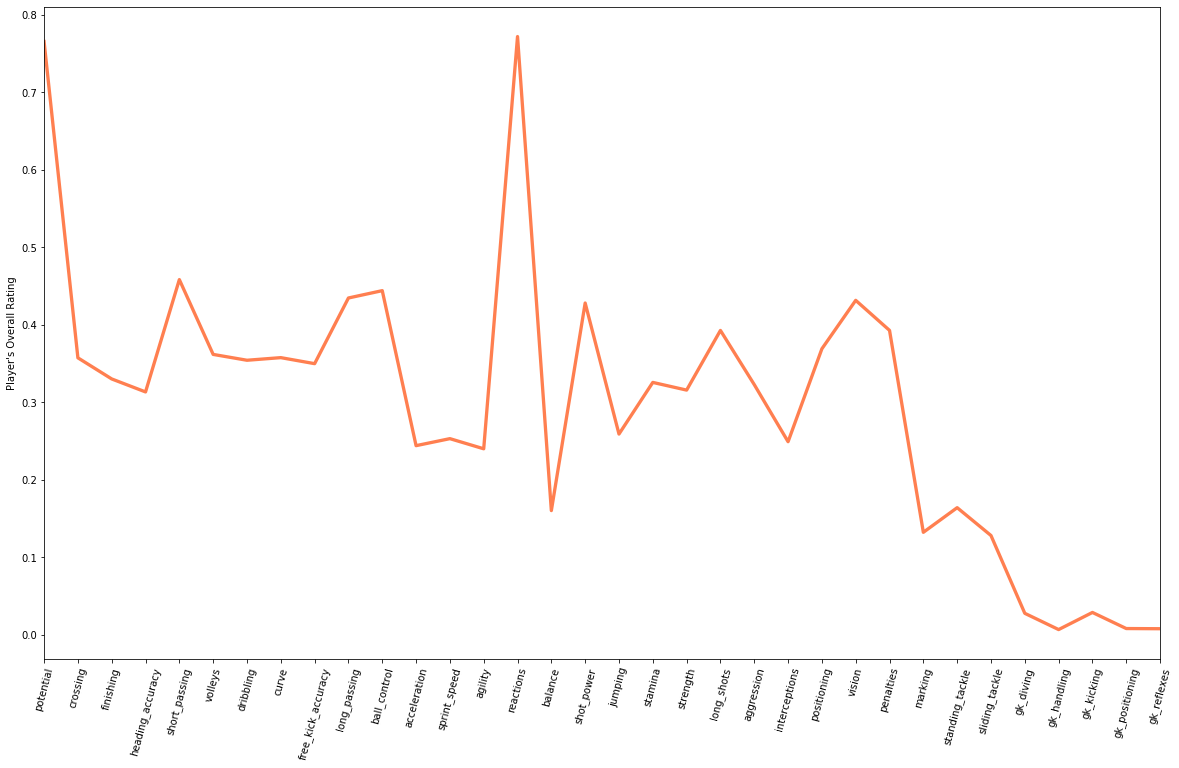

In [88]:
plot_dataframe(df2, 'Player\'s Overall Rating')


In [89]:
#based on the codes and simple mathematical operations we formed an opinions, but if we want to dig deeper into more detailed analysis, we have to know the domain knoweledge associated to each feature, and analyze the features with 
# We can define the features we want to use separate the players in the next code: 
features_select = ['potential', 'agility', 'reactions', 'stamina', 'strength', 'gk_kicking']


In [90]:
#Now we want to make a new data_frame that include values only for the 6 features we defined
df_features= df[features_select].copy(deep=True)

In [91]:
df_features.tail()
df_features = df_features.dropna()


#since our aim is to create separations between the selected features and since the Partitions are independent of each other, we will perform a KMean Clustering:
#Steps for K-mean iterative fitting: 
- Pick a value for k (the number of clusters to create)
- Initialize k 'centroids' (starting points) in your data
- Create your clusters. Assign each point to the nearest centroid.
- Make your clusters better. Move each centroid to the center of its cluster.
- Repeat steps 3-4 until your centroids converge.

Now we have scale the dataframe that contains the 5 features

In [92]:
data = scale(df_features)
data

array([[ 0.38294808,  0.30893482,  0.96792962,  1.13226392,  0.04696054,
        -0.5451377 ],
       [ 1.5983944 ,  0.771768  ,  1.07727915,  1.43527971,  0.37794669,
        -0.5924328 ],
       [-0.83249824, -0.77100924, -0.01621623, -1.51912426, -0.2840256 ,
        -0.3086622 ],
       ...,
       [-0.52863666, -0.77100924, -1.43776024,  0.67774023, -0.61501175,
        -0.5924328 ],
       [ 0.68680966,  1.00318458,  0.31183238,  0.67774023, -0.11853253,
        -0.6397279 ],
       [ 2.35804835, -1.92809217,  0.639881  ,  1.20801787,  2.36386357,
         2.43445364]])

When choosing the K, there are different methods of initializing centroids, either randomly, manually, or for similar to our case we have to use the special KMeans++ method in Sklearn (This initializes the centroids to be generally distant from each other):
Note that while manual is reccomended when you are very knowledgeable of your data, but is rarely done in practice. 

In [93]:
k = 6

In [94]:
#creating our model
model = KMeans(init='k-means++', n_clusters=k, n_init=20).fit(data)


In [95]:
pd.value_counts(model.labels_, sort=False)


0    42800
1    25539
2    45329
3    18050
4    13417
5    35219
dtype: int64

In [96]:
from customplot import pd_centers

P = pd_centers(featuresUsed=df_features, centers=model.cluster_centers_)

print(P)

   potential   agility  reactions   stamina  strength  gk_kicking  prediction
0   0.828221  0.495818   0.911536  0.738602  0.444852   -0.479467           0
1  -1.139896 -0.133683  -1.291379 -0.486262 -0.698545   -0.179968           1
2  -0.409823 -0.680844  -0.199000  0.039789  0.773745   -0.468158           2
3   0.678485  0.104529   0.364535  0.307713  0.180265    2.025524           3
4  -0.306022 -1.516438  -0.471591 -2.124823 -0.343858    1.919787           4
5   0.116554  0.894939   0.077936  0.055642 -0.991355   -0.453974           5


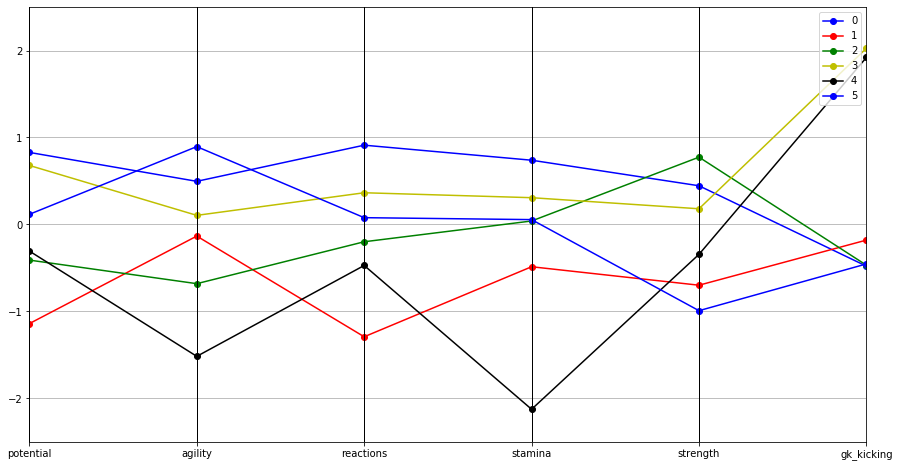

In [97]:
#Visualizing our Clusters
%matplotlib inline
parallel_plot(P)



In [107]:
##Findings:


In [108]:
# Now we will find the correlation of the variables I choose above to eachother. 

In [109]:
df.select_dtypes(include =['float64','int64']).head().\
loc[:,df.select_dtypes(include =['float64','int64']).columns[3:]].head()




,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
109890,71.0,76.0,65.0,50.0,66.0,72.0,47.0,65.0,68.0,68.0,...,74.0,75.0,71.0,65.0,68.0,13.0,13.0,9.0,8.0,7.0
151061,77.0,84.0,77.0,65.0,68.0,79.0,69.0,82.0,69.0,54.0,...,81.0,59.0,59.0,69.0,72.0,11.0,10.0,8.0,8.0,7.0
165325,64.0,68.0,40.0,71.0,57.0,67.0,56.0,54.0,63.0,68.0,...,69.0,54.0,23.0,23.0,27.0,7.0,14.0,14.0,7.0,12.0
26662,78.0,84.0,69.0,77.0,70.0,75.0,77.0,80.0,72.0,54.0,...,72.0,71.0,30.0,29.0,21.0,6.0,13.0,6.0,14.0,6.0
55823,59.0,75.0,60.0,48.0,46.0,57.0,29.0,59.0,47.0,33.0,...,55.0,45.0,60.0,59.0,63.0,7.0,8.0,7.0,7.0,11.0


In [110]:
corr2 = df.select_dtypes(include =['float64','int64']).\
loc[:,df.select_dtypes(include =['float64','int64']).columns[3:]].corr()

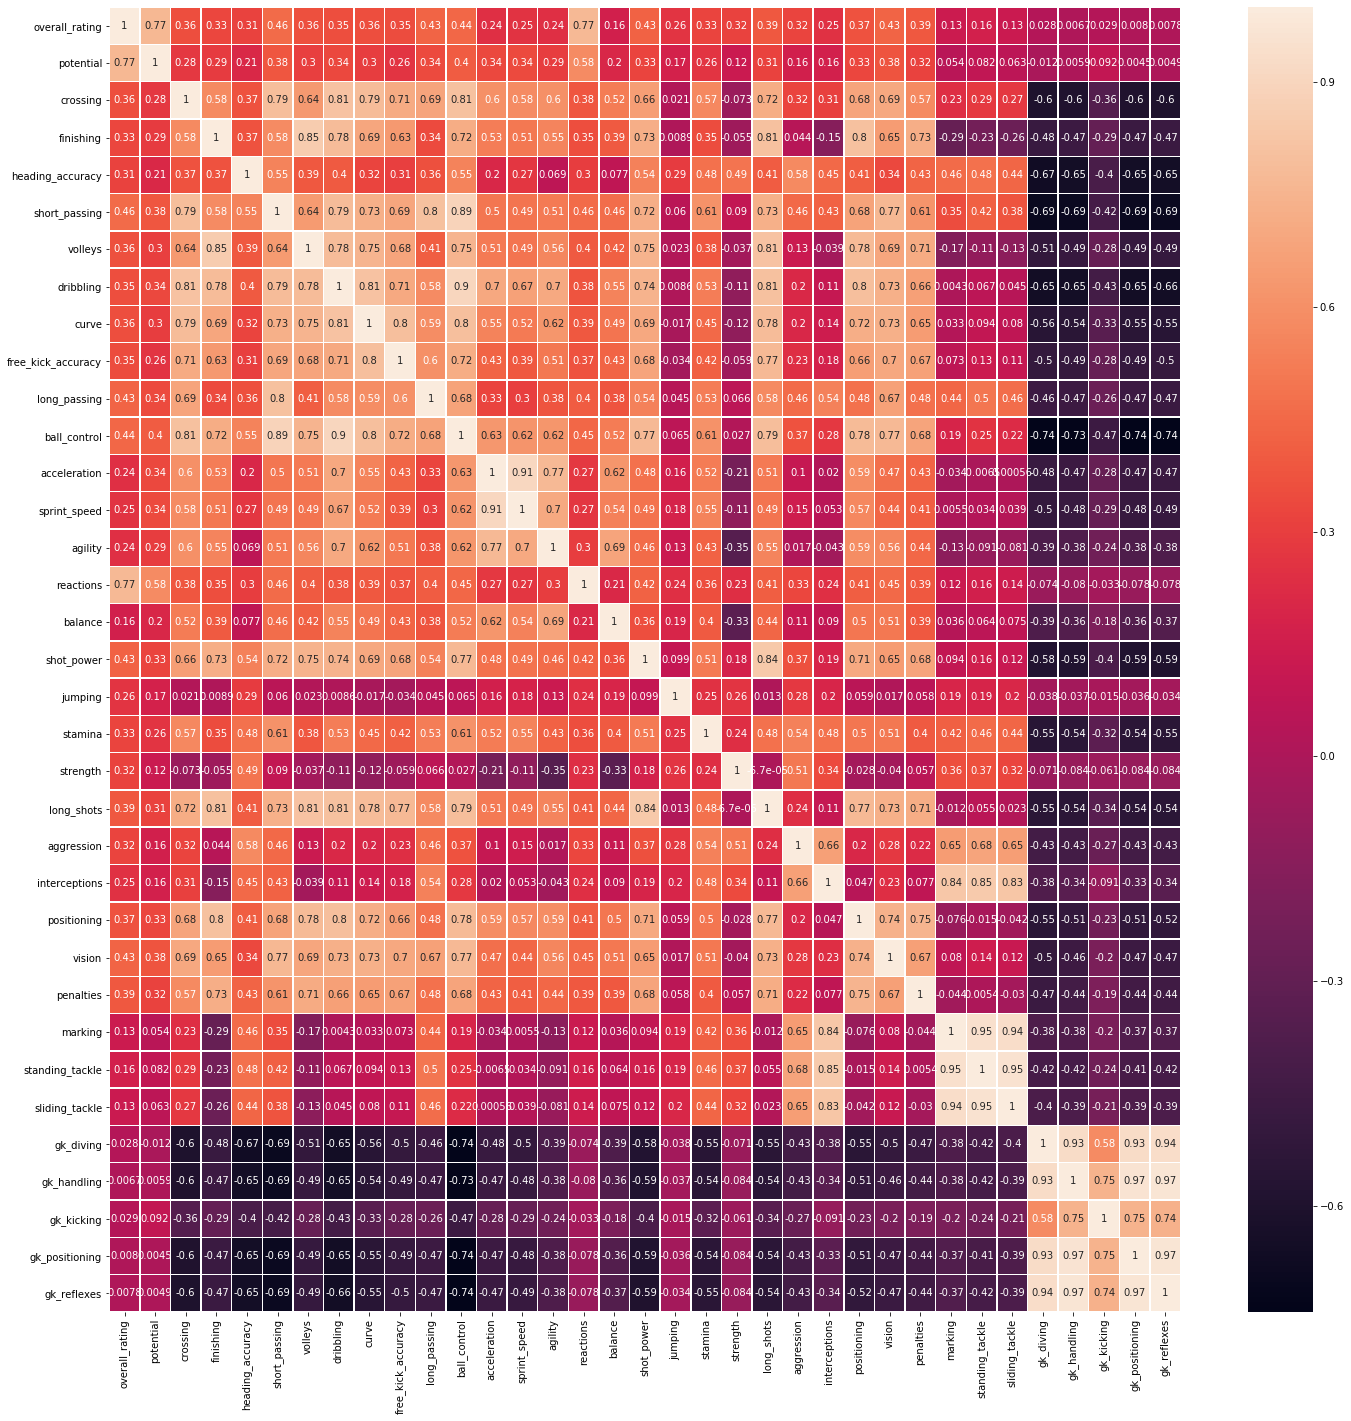

In [113]:
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)